In [2539]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2540]:
# reading csv into a dataframe
df = pd.read_csv('Heart Disease.csv')

In [2541]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Columns in the dataframe

In [2542]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'HeartDisease'],
      dtype='object')

In [2543]:
correlation_matrix = df.corr()
print(correlation_matrix)
correlation_matrix

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017352       0.197596    0.317930   
age             -0.028979  1.000000  -0.165883      -0.213748   -0.192791   
education        0.017352 -0.165883   1.000000       0.018532    0.008085   
currentSmoker    0.197596 -0.213748   0.018532       1.000000    0.769690   
cigsPerDay       0.317930 -0.192791   0.008085       0.769690    1.000000   
BPMeds          -0.052506  0.122995  -0.010815      -0.048938   -0.046134   
prevalentStroke -0.004546  0.057655  -0.035112      -0.032988   -0.032707   
prevalentHyp     0.005313  0.307194  -0.081970      -0.103260   -0.066146   
diabetes         0.015708  0.101258  -0.038680      -0.044295   -0.037067   
totChol         -0.070322  0.262131  -0.023115      -0.046562   -0.026320   
sysBP           -0.035989  0.394302  -0.129631      -0.130230   -0.088780   
diaBP            0.057933  0.206104  -0.062316      -0.107746   -0.056632   

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


Correlation matrix for feature selection

In [2544]:
X=['age','prevalentHyp','sysBP','diabetes','glucose']

In [2545]:
t=df.isna().any()
t

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
HeartDisease       False
dtype: bool

In [2546]:
mean_edu = df['education'].mean()
df.loc[:, 'education'] = df['education'].fillna(mean_edu)

mean_cigs = df['cigsPerDay'].mean()
df.loc[:, 'cigsPerDay'] = df['cigsPerDay'].fillna(mean_cigs)

mean_Bpmeds = df['BPMeds'].mean()
df.loc[:, 'BPMeds'] = df['BPMeds'].fillna(mean_Bpmeds)

mean_totChol = df['totChol'].mean()
df.loc[:, 'totChol'] = df['totChol'].fillna(mean_totChol)

mean_BMI = df['BMI'].mean()
df.loc[:, 'BMI'] = df['BMI'].fillna(mean_BMI)

mean_heartRate = df['heartRate'].mean()
df.loc[:, 'heartRate'] = df['heartRate'].fillna(mean_heartRate)

mean_glucose = df['glucose'].mean()
df.loc[:, 'glucose'] = df['glucose'].fillna(mean_glucose)

In [2547]:
t=df.isna().any()
t

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
HeartDisease       False
dtype: bool

Train, validation and test split creation

In [2548]:

#70:30 split on train and temp
train_df,temp_df = train_test_split(df,test_size=0.3,random_state=0)   

#50:50 split of temp on valid and test  
valid_df,test_df = train_test_split(temp_df,test_size=0.5,random_state=0)

#final ratio of train:valid:test => 70:15:15
 

Rowxcolumn of df and each split

In [2549]:
train_df.shape, valid_df.shape, test_df.shape

((2966, 16), (636, 16), (636, 16))

# (a)

In [2550]:
def standard_scaler(df):
    df = (df - df.mean())/df.std()
    return df

def min_max_scaler(df):
    df = (df - df.min())/(df.max()-df.min())
    return df

In [2551]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()
scaler= StandardScaler()



train_new=train_df.drop(['HeartDisease'],axis=1)
valid_new=valid_df.drop(['HeartDisease'],axis=1)

X_train=train_new.to_numpy()
X_train = scaler.fit_transform(X_train)

ones_column = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, ones_column))

y_train = train_df['HeartDisease'].to_numpy()


X_valid = valid_new.to_numpy()
X_valid = scaler.transform(X_valid)

ones_column = np.ones((X_valid.shape[0], 1))
X_valid = np.hstack((X_valid, ones_column))

y_valid = valid_df['HeartDisease'].to_numpy()




In [2552]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2966, 16), (2966,), (636, 16), (636,))

In [2553]:
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1/(1 + np.exp(-x))

def predict(X, theta):
    return sigmoid(np.dot(X, theta))

In [2554]:
epsilon = 1e-10

def accuracy(X,y,weights):
    # print(weights)
    y_pred = predict(X, weights)
    y_pred = np.round(y_pred)
    # print(y_pred)
    acc = np.mean(y_pred == y)
    return acc

def cross_entropy_loss(new_weights,X, y):
    y_pred = predict(X, new_weights)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    # print(loss)
    return loss
 
def gradient_descent(weights,learning_rate,X,y):
    #X = 2966x5
    #weights = 5x1
    #y = 2966x1
    #X.T = 5x2966
    y_pred = predict(X, weights) 
    gradient = np.dot(X.T, (y_pred - y))/len(X)
    gradient = learning_rate * (gradient)
    weights -= gradient
    return weights

def train_model(learning_rate, epochs,train_loss,val_loss,train_acc,val_acc,weights,X_train,y_train,X_valid,y_valid):
    # print(weights.shape)
    for i in range(epochs):
        weights = gradient_descent(weights,learning_rate,X_train,y_train)
        t_loss=cross_entropy_loss(weights,X_train,y_train)
        v_loss=cross_entropy_loss(weights,X_valid,y_valid)
        t_acc = accuracy(X_train,y_train,weights)
        v_acc = accuracy(X_valid,y_valid,weights)
        
        if i%1==0:
            print(f'Epoch: {i}, Training Loss: {t_loss}, Validation Loss: {v_loss}, Training Accuracy: {t_acc}, Validation Accuracy: {v_acc}')
            train_acc.append(t_acc)
            val_acc.append(v_acc)
            train_loss.append(t_loss)
            val_loss.append(v_loss)
    return weights


In [2555]:
weights = np.zeros(16) #16x1

train_loss=[]
val_loss=[]

train_accuracy=[]
val_accuracy=[]
train_model(0.1,100,train_loss,val_loss,train_accuracy,val_accuracy,weights,X_train,y_train,X_valid,y_valid)
print(weights)

Epoch: 0, Training Loss: 0.6784698151007384, Validation Loss: 0.6798398786130383, Training Accuracy: 0.8145650708024275, Validation Accuracy: 0.7924528301886793
Epoch: 1, Training Loss: 0.6647279729239077, Validation Loss: 0.6674035313595759, Training Accuracy: 0.8192852326365475, Validation Accuracy: 0.7940251572327044
Epoch: 2, Training Loss: 0.6518423890958104, Validation Loss: 0.6557633790471822, Training Accuracy: 0.8233310856372218, Validation Accuracy: 0.7987421383647799
Epoch: 3, Training Loss: 0.6397417444934772, Validation Loss: 0.6448523491213426, Training Accuracy: 0.8260283209710048, Validation Accuracy: 0.800314465408805
Epoch: 4, Training Loss: 0.628361934373761, Validation Loss: 0.6346103067195756, Training Accuracy: 0.8297370195549562, Validation Accuracy: 0.8034591194968553
Epoch: 5, Training Loss: 0.6176453481453326, Validation Loss: 0.6249833288603891, Training Accuracy: 0.8327714093054619, Validation Accuracy: 0.8050314465408805
Epoch: 6, Training Loss: 0.607540184

Epoch: 28, Training Loss: 0.4783715588352646, Validation Loss: 0.502698379894847, Training Accuracy: 0.8506405933917734, Validation Accuracy: 0.8144654088050315
Epoch: 29, Training Loss: 0.47507093274011386, Validation Loss: 0.4999181904483715, Training Accuracy: 0.851652056641942, Validation Accuracy: 0.8144654088050315
Epoch: 30, Training Loss: 0.4719060936884101, Validation Loss: 0.4972619087731344, Training Accuracy: 0.851652056641942, Validation Accuracy: 0.8144654088050315
Epoch: 31, Training Loss: 0.4688702508970203, Validation Loss: 0.49472317719930076, Training Accuracy: 0.8519892110586649, Validation Accuracy: 0.8160377358490566
Epoch: 32, Training Loss: 0.46595701866251404, Validation Loss: 0.49229601642596443, Training Accuracy: 0.8530006743088334, Validation Accuracy: 0.8160377358490566
Epoch: 33, Training Loss: 0.46316038724209063, Validation Loss: 0.4899747987881683, Training Accuracy: 0.8533378287255563, Validation Accuracy: 0.8160377358490566
Epoch: 34, Training Loss: 

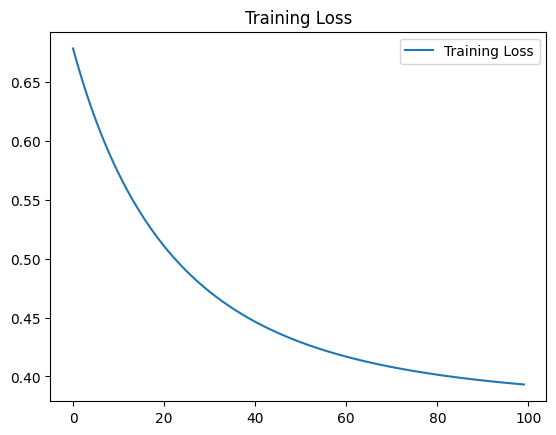

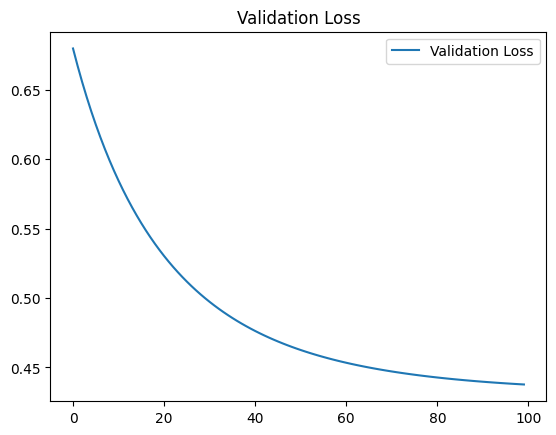

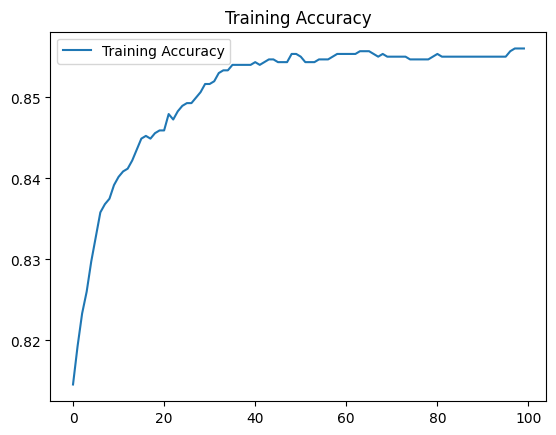

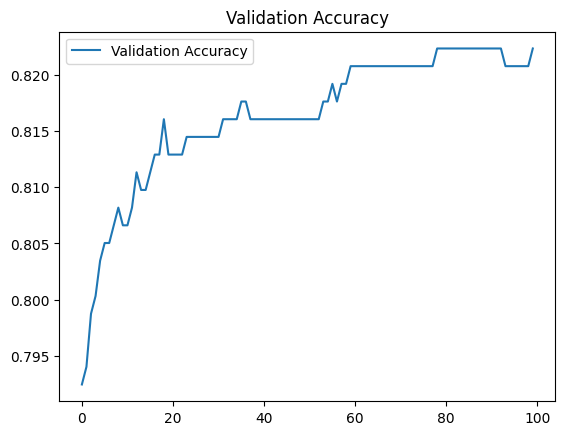

In [2556]:
#plot training and validation loss against 1000 epochs
import matplotlib.pyplot as plt
plt.plot(train_loss,label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()
plt.plot(val_loss,label='Validation Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()
plt.plot(train_accuracy,label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()
plt.plot(val_accuracy,label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()




In [2557]:

#print accuracy achieved on validation set
print(accuracy(X_train,y_train,weights))
print(accuracy(X_valid,y_valid,weights))

#predict on test set
test_new=test_df.drop(['HeartDisease'],axis=1)
X_test = test_new.to_numpy()
X_test = scaler.transform(X_test)

ones_column = np.ones((X_test.shape[0], 1))
X_test = np.hstack((X_test, ones_column))

y_test = test_df['HeartDisease'].to_numpy()

print(accuracy(X_test,y_test,weights))


0.8560350640593392
0.8223270440251572
0.8757861635220126


In [2558]:
weights

array([ 0.11832631,  0.27753974, -0.02379078,  0.04885094,  0.122889  ,
        0.03443112,  0.06791938,  0.11061409,  0.08000651,  0.06524264,
        0.16966564,  0.00856838,  0.04164205,  0.01224486,  0.09338083,
       -1.44945888])

# (b)

In [2559]:
t=train_new.isna().any()
t

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
dtype: bool

In [2560]:
train_new.columns, valid_new.columns

(Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose'],
       dtype='object'),
 Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose'],
       dtype='object'))

----With Scaling----
Epoch: 0, Training Loss: 0.6671423186350062, Validation Loss: 0.6700313084917693, Training Accuracy: 0.8496291301416049, Validation Accuracy: 0.8160377358490566
Epoch: 1, Training Loss: 0.6441926806886081, Validation Loss: 0.6497851767133603, Training Accuracy: 0.8496291301416049, Validation Accuracy: 0.8160377358490566
Epoch: 2, Training Loss: 0.6239248016033372, Validation Loss: 0.6320482608564101, Training Accuracy: 0.8496291301416049, Validation Accuracy: 0.8160377358490566
Epoch: 3, Training Loss: 0.6060059275330575, Validation Loss: 0.6165002396034818, Training Accuracy: 0.8496291301416049, Validation Accuracy: 0.8160377358490566
Epoch: 4, Training Loss: 0.5901421118702438, Validation Loss: 0.6028589464361769, Training Accuracy: 0.8496291301416049, Validation Accuracy: 0.8160377358490566
Epoch: 5, Training Loss: 0.5760753462212298, Validation Loss: 0.5908774188929643, Training Accuracy: 0.8496291301416049, Validation Accuracy: 0.8160377358490566
Epoch: 6, Tra

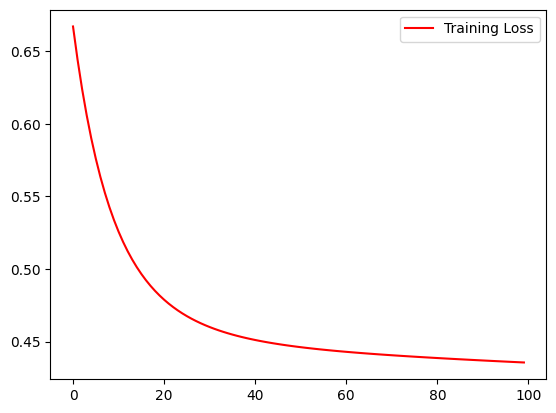

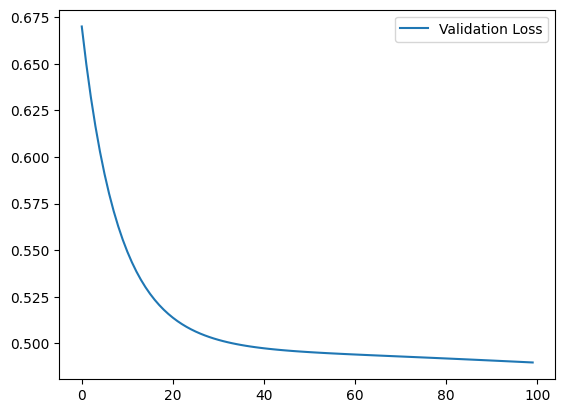

In [2561]:
print("----With Scaling----")

scaler_min_max = MinMaxScaler()

X_train_sc = train_new.to_numpy()
# print(X_train_sc.shape)
X_train_sc = scaler_min_max.fit_transform(X_train_sc)
ones_column = np.ones((X_train_sc.shape[0], 1))
X_train_sc = np.hstack((X_train_sc, ones_column))

y_train_sc = train_df['HeartDisease'].to_numpy()

X_valid_sc = valid_new.to_numpy()
X_valid_sc = scaler_min_max.transform(X_valid_sc)
ones_column = np.ones((X_valid_sc.shape[0], 1))
X_valid_sc = np.hstack((X_valid_sc, ones_column))

y_valid_sc = valid_df['HeartDisease'].to_numpy()

weights_with_scaling = np.zeros(16) #16x1
# weights_with_scaling = np.random.rand(16) #16x1

train_loss_sc=[]
val_loss_sc=[]
train_accuracy_sc=[]
val_accuracy_sc=[]

weights_with_scaling=train_model(0.1,100,train_loss_sc,val_loss_sc,train_accuracy_sc,val_accuracy_sc,weights_with_scaling,X_train_sc,y_train_sc,X_valid_sc,y_valid_sc)
print(weights_with_scaling)
#plot training and validation loss against 1000 epochs
import matplotlib.pyplot as plt
plt.plot(train_loss_sc,label='Training Loss',color='red')
plt.legend()
plt.show()

plt.plot(val_loss_sc,label='Validation Loss')
plt.legend()
plt.show()

# plt.plot(train_accuracy_sc,label='Training Accuracy',color='red')
# plt.legend()
# plt.show()

# plt.plot(val_accuracy_sc,label='Validation Accuracy')
# plt.legend()
# plt.show()


In [2562]:
X_train_sc.shape

(2966, 16)

----No Scaling----
Epoch: 0, Training Loss: 0.6784698151007384, Validation Loss: 0.6798398786130383, Training Accuracy: 0.8145650708024275, Validation Accuracy: 0.7924528301886793
Epoch: 1, Training Loss: 0.6647279729239077, Validation Loss: 0.6674035313595759, Training Accuracy: 0.8192852326365475, Validation Accuracy: 0.7940251572327044
Epoch: 2, Training Loss: 0.6518423890958104, Validation Loss: 0.6557633790471822, Training Accuracy: 0.8233310856372218, Validation Accuracy: 0.7987421383647799
Epoch: 3, Training Loss: 0.6397417444934772, Validation Loss: 0.6448523491213426, Training Accuracy: 0.8260283209710048, Validation Accuracy: 0.800314465408805
Epoch: 4, Training Loss: 0.628361934373761, Validation Loss: 0.6346103067195756, Training Accuracy: 0.8297370195549562, Validation Accuracy: 0.8034591194968553
Epoch: 5, Training Loss: 0.6176453481453326, Validation Loss: 0.6249833288603891, Training Accuracy: 0.8327714093054619, Validation Accuracy: 0.8050314465408805
Epoch: 6, Trainin

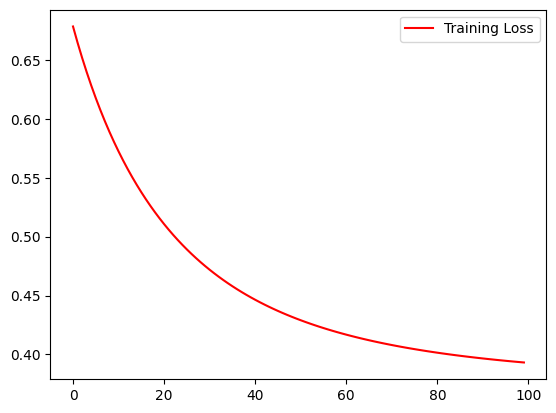

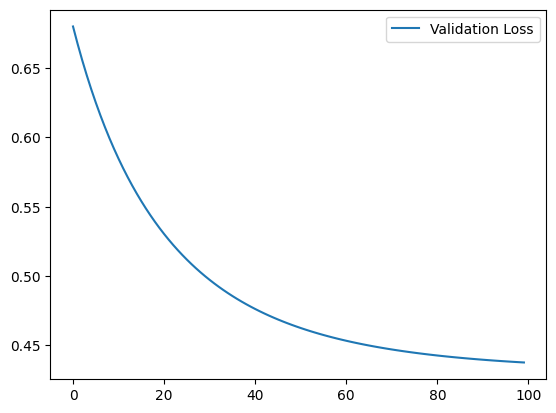

In [2563]:
print("----No Scaling----")

X_train_b=train_new.to_numpy()
X_train_b = scaler.fit_transform(X_train_b)
ones_column = np.ones((X_train_b.shape[0], 1))
X_train_b = np.hstack((X_train_b, ones_column))

y_train_b = train_df['HeartDisease'].to_numpy()

X_valid_b = valid_new.to_numpy()
X_valid_b = scaler.transform(X_valid_b)
ones_column = np.ones((X_valid_b.shape[0], 1))
X_valid_b = np.hstack((X_valid_b, ones_column))

y_valid_b = valid_df['HeartDisease'].to_numpy()

weights_no_scaling = np.zeros(16) #16x1

# weights_no_scaling = np.random.rand(16)

train_loss_b=[]
val_loss_b=[]
train_accuracy_b=[]
val_accuracy_b=[]

train_model(0.1,100,train_loss_b,val_loss_b,train_accuracy_b,val_accuracy_b,weights_no_scaling,X_train_b,y_train_b,X_valid_b,y_valid_b)

#plot training and validation loss against 1000 epochs
import matplotlib.pyplot as plt
plt.plot(train_loss_b,label='Training Loss',color='red')
plt.legend()
plt.show()

plt.plot(val_loss_b,label='Validation Loss')
plt.legend()
plt.show()

# plt.plot(train_accuracy_b,label='Training Accuracy',color='red')
# plt.legend()
# plt.show()

# plt.plot(val_accuracy_b,label='Validation Accuracy')
# plt.legend()
# plt.show()


In [2564]:
print(weights_with_scaling)
print(weights_no_scaling)

[-0.14854239 -0.20933228 -0.30536943 -0.28378112 -0.04082093  0.02607234
  0.0134021   0.06863125  0.04202083 -0.19359828 -0.14120263 -0.24309843
 -0.20430728 -0.25413953 -0.07350315 -0.8528507 ]
[ 0.11832631  0.27753974 -0.02379078  0.04885094  0.122889    0.03443112
  0.06791938  0.11061409  0.08000651  0.06524264  0.16966564  0.00856838
  0.04164205  0.01224486  0.09338083 -1.44945888]


# (c)

In [2565]:
#give confusion matrix on the validation set
from sklearn.metrics import confusion_matrix

def conf_matrix(X,y,weights):
    y_pred = np.round(predict(X, weights))
    # print(y_pred)
    print(confusion_matrix(y, y_pred))

print("----Without Scaling----")
conf_matrix(X_valid_b,y_valid_b,weights_no_scaling)

print("----With Scaling----")
conf_matrix(X_valid_sc,y_valid_sc,weights_with_scaling)


----Without Scaling----
[[516   3]
 [110   7]]
----With Scaling----
[[519   0]
 [117   0]]


In [2566]:
#give f1 score and ROC-AUC score on the validation set


from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

def scores(X,y,weights):
    y_pred = np.round(predict(X, weights))
    precision=precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC-AUC Score: {roc_auc}')
    print()

print("----Without Scaling----")
scores(X_valid_b,y_valid_b,weights_no_scaling)

print("----After Scaling----")
scores(X_valid_sc,y_valid_sc,weights_with_scaling)

----Without Scaling----
Precision: 0.7
Recall: 0.05982905982905983
F1 Score: 0.11023622047244094
ROC-AUC Score: 0.5270243565041253

----After Scaling----
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5



c:\Users\SAUMIL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# (d)

-----------Stochastic Gradient Descent------------------

In [2567]:
def stochastic_gradient_descent(weights,learning_rate,X,y):
    indices = np.random.permutation(len(X))
    print(indices.shape)
    for i in indices:
        xi, yi = X[i:i+1], y[i:i+1]
        y_pred = predict(xi, weights)
        # print(yi,y_pred,y_pred-yi)
        gradient = np.dot(xi.T, (y_pred - yi))
        # print(weights.shape,gradient.shape,yi.shape,xi.shape,y_pred.shape)
        weights -= learning_rate * gradient
        return weights

def train_model_stochastic(learning_rate, epochs,train_loss,val_loss,train_acc,val_acc,weights,X_train,y_train,X_valid,y_valid):
    for i in range(epochs):
        weights = stochastic_gradient_descent(weights,learning_rate,X_train,y_train)
        t_loss=cross_entropy_loss(weights,X_train,y_train)
        v_loss=cross_entropy_loss(weights,X_valid,y_valid)
        t_acc = accuracy(X_train,y_train,weights)
        v_acc = accuracy(X_valid,y_valid,weights)
        
        if i%1==0:
            print(f'Epoch: {i}, Training Loss: {t_loss}, Validation Loss: {v_loss}, Training Accuracy: {t_acc}, Validation Accuracy: {v_acc}')
            train_acc.append(t_acc)
            val_acc.append(v_acc)
            train_loss.append(t_loss)
            val_loss.append(v_loss)
    return weights


-----------Mini-Batch Gradient Descent------------------

In [2568]:
def mini_batch_gradient_descent(weights,learning_rate,X,y,batch_size,start):
    for i in range(start, start+ batch_size):
        x = X[i:i+1]
        y_n = y[i:i+1]
        y_pred = predict(x, weights)
        gradient = np.dot(x.T, (y_pred - y_n))
        gradient = learning_rate * (gradient / len(X))
        weights -= gradient
    return weights

def train_model_mini_batch(learning_rate, epochs,train_loss,val_loss,train_acc,val_acc,weights,X_train,y_train,X_valid,y_valid,batch_size):
    start=0
    for i in range(epochs):
        weights = mini_batch_gradient_descent(weights,learning_rate,X_train,y_train,batch_size,start)
        start+=batch_size
        t_loss=cross_entropy_loss(weights,X_train,y_train)
        v_loss=cross_entropy_loss(weights,X_valid,y_valid)
        t_acc = accuracy(X_train,y_train,weights)
        v_acc = accuracy(X_valid,y_valid,weights)
        
        if i%1==0:
            print(f'Epoch: {i}, Training Loss: {t_loss}, Validation Loss: {v_loss}, Training Accuracy: {t_acc}, Validation Accuracy: {v_acc}')
            train_acc.append(t_acc)
            val_acc.append(v_acc)
            train_loss.append(t_loss)
            val_loss.append(v_loss)
    return weights

In [2569]:
#we use data with standard scaled for stochastic and mini batch gradient descent

weights_stochastic = np.zeros(16) #16x1
weights_mini_batch = np.zeros(16) #16x1

train_loss_stochastic=[]
val_loss_stochastic=[]
train_accuracy_stochastic=[]
val_accuracy_stochastic=[]

train_loss_mini_batch=[]
val_loss_mini_batch=[]
train_accuracy_mini_batch=[]
val_accuracy_mini_batch=[]
# batch_size=4
batch_size=8

print("----Stochastic Gradient Descent----")
weights_stochastic=train_model_stochastic(0.01,100,train_loss_stochastic,val_loss_stochastic,train_accuracy_stochastic,val_accuracy_stochastic,weights_stochastic,X_train,y_train,X_valid,y_valid)

print("----Mini Batch Gradient Descent----")
weights_mini_batch=train_model_mini_batch(0.1,100,train_loss_mini_batch,val_loss_mini_batch,train_accuracy_mini_batch,val_accuracy_mini_batch,weights_mini_batch,X_train,y_train,X_valid,y_valid,batch_size)

----Stochastic Gradient Descent----
(2966,)
Epoch: 0, Training Loss: 0.6948764304295596, Validation Loss: 0.6944668168079762, Training Accuracy: 0.4804450438300742, Validation Accuracy: 0.4858490566037736
(2966,)
Epoch: 1, Training Loss: 0.6931607877554361, Validation Loss: 0.6927337744100316, Training Accuracy: 0.538435603506406, Validation Accuracy: 0.5455974842767296
(2966,)
Epoch: 2, Training Loss: 0.6908543633300804, Validation Loss: 0.6905071525004698, Training Accuracy: 0.5994605529332434, Validation Accuracy: 0.6022012578616353
(2966,)
Epoch: 3, Training Loss: 0.6925063776621418, Validation Loss: 0.6924409032792034, Training Accuracy: 0.5492245448415374, Validation Accuracy: 0.5361635220125787
(2966,)
Epoch: 4, Training Loss: 0.6913941256165603, Validation Loss: 0.6911038579138996, Training Accuracy: 0.583614295347269, Validation Accuracy: 0.5911949685534591
(2966,)
Epoch: 5, Training Loss: 0.6890449870260206, Validation Loss: 0.6889446642566159, Training Accuracy: 0.6014834794

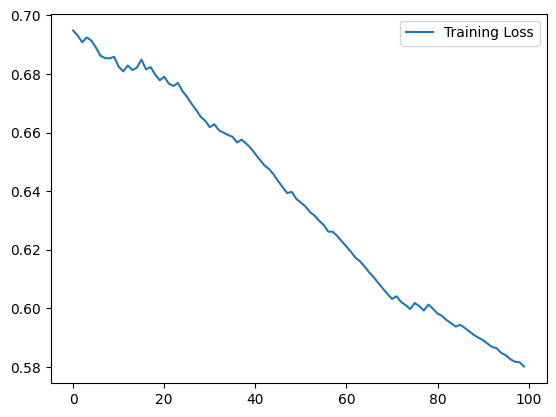

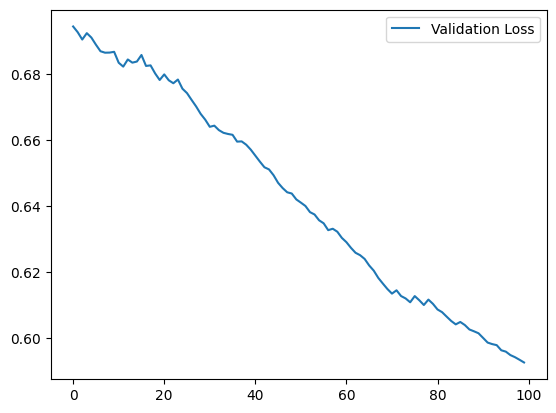

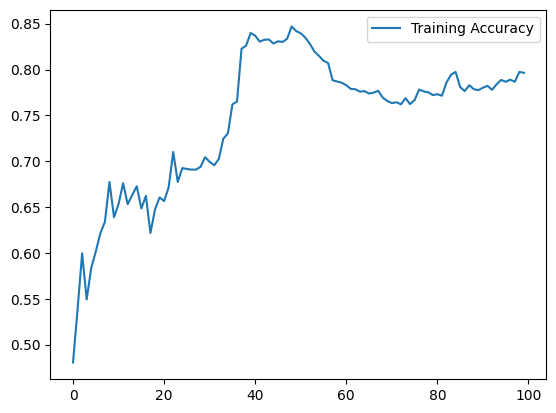

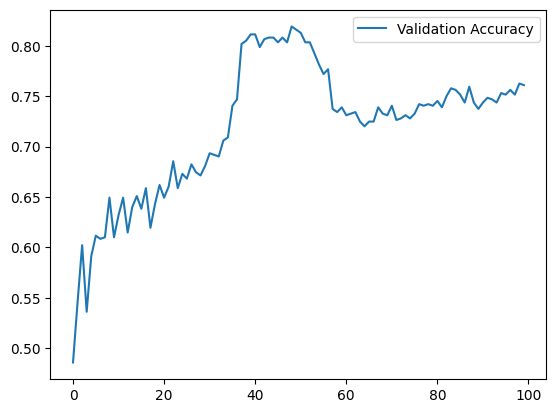

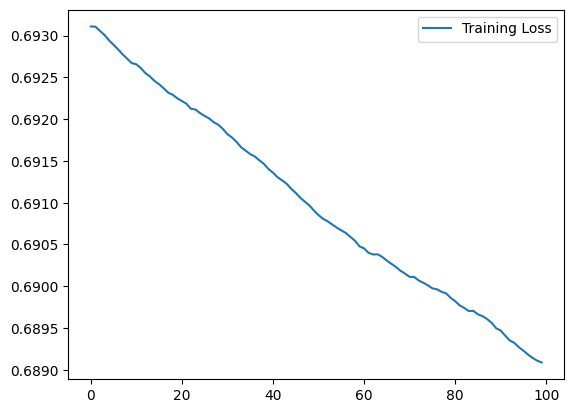

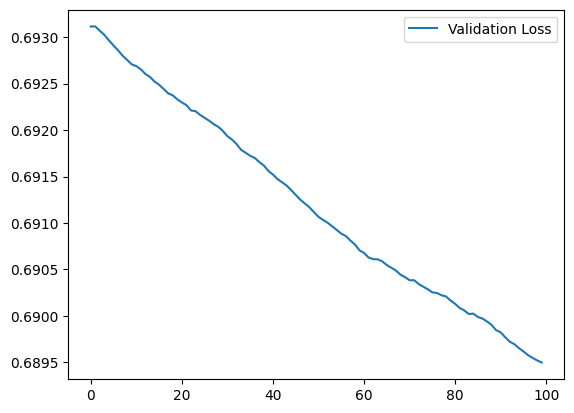

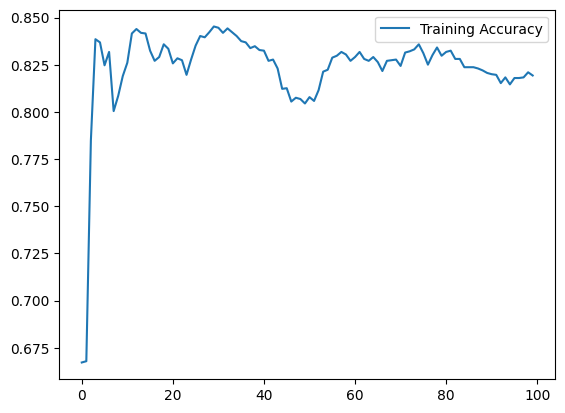

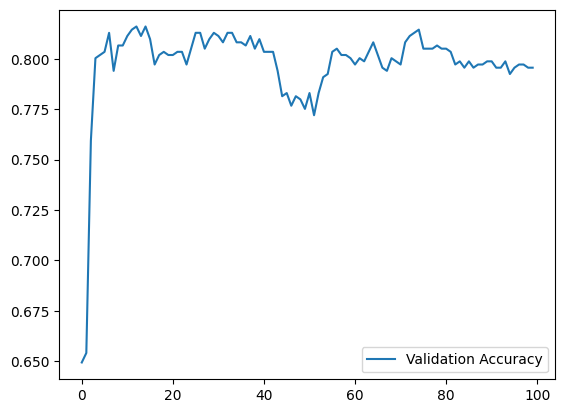

In [2570]:
#plot training and validation loss against 1000 epochs
import matplotlib.pyplot as plt
plt.plot(train_loss_stochastic,label='Training Loss')
plt.legend()
plt.show()
plt.plot(val_loss_stochastic,label='Validation Loss')
plt.legend()
plt.show()
plt.plot(train_accuracy_stochastic,label='Training Accuracy')
plt.legend()
plt.show()
plt.plot(val_accuracy_stochastic,label='Validation Accuracy')
plt.legend()
plt.show()

#plot training and validation loss against 1000 epochs
import matplotlib.pyplot as plt
plt.plot(train_loss_mini_batch,label='Training Loss')
plt.legend()
plt.show()
plt.plot(val_loss_mini_batch,label='Validation Loss')
plt.legend()
plt.show()
plt.plot(train_accuracy_mini_batch,label='Training Accuracy')
plt.legend()
plt.show()
plt.plot(val_accuracy_mini_batch,label='Validation Accuracy')
plt.legend()
plt.show()

# (e)

In [2571]:
#write k fold cross validation function from scratch
k=5

def k_fold(df):
    df_k = []
    size = len(df)//k
    for i in range(k):
        st = i*size
        en = (i+1)*size
        if i == k-1:
            en = len(df)
        df_k.append(df[st:en])
    return df_k

k_fold_df = k_fold(df)
k_fold_df[0].shape

(847, 16)

In [2572]:
#creation of train and validation set for k fold cross validation
def train_valid_k_fold(k_fold_df,i):
    valid_df = k_fold_df[i]
    train_df = pd.concat([k_fold_df[j] for j in range(k) if j != i])
    

    X_train_fold = train_df.drop(['HeartDisease'],axis=1)
    X_valid_fold = valid_df.drop(['HeartDisease'],axis=1)

    scaler = StandardScaler()
    X_train_fold = X_train_fold.to_numpy()
    X_train_fold = scaler.fit_transform(X_train_fold)
    ones_column = np.ones((X_train_fold.shape[0], 1))
    X_train_fold = np.hstack((X_train_fold, ones_column))

    y_train_fold = train_df['HeartDisease'].to_numpy()

    X_valid_fold = X_valid_fold.to_numpy()
    X_valid_fold = scaler.transform(X_valid_fold)
    ones_column = np.ones((X_valid_fold.shape[0], 1))
    X_valid_fold = np.hstack((X_valid_fold, ones_column))

    y_valid_fold = valid_df['HeartDisease'].to_numpy()

    return X_train_fold, y_train_fold, X_valid_fold, y_valid_fold


In [2573]:
def scores(weights,X,y):
    y_pred = np.round(predict(X, weights))
    accuracy = np.mean(y_pred == y)
    precision = np.sum(y_pred[y == 1] == y[y == 1]) / np.sum(y_pred == 1)
    recall = np.sum(y_pred[y == 1] == y[y == 1]) / np.sum(y == 1)
    f1_score = 2 * precision * recall / (precision + recall)

    return accuracy, precision, recall, f1_score

In [2574]:
acc=[]
precision=[]
recall=[]
f1_score=[]

d={}

for i in range(k):
    X_train_fold, y_train_fold, X_valid_fold, y_valid_fold = train_valid_k_fold(k_fold_df,i)
    weight_k_fold = np.zeros(16)
    train_loss_k_fold=[]
    val_loss_k_fold=[]
    train_accuracy_k_fold=[]
    val_accuracy_k_fold=[]

    print(f'----K Fold Cross Validation for Fold {i}----')
    weights=train_model(0.1,100,train_loss_k_fold,val_loss_k_fold,train_accuracy_k_fold,val_accuracy_k_fold,weight_k_fold,X_train_fold,y_train_fold,X_valid_fold,y_valid_fold)
    accu, prec, rec, f1 = scores(weights,X_valid_fold,y_valid_fold)
    acc.append(accu)
    precision.append(prec)
    recall.append(rec)
    f1_score.append(f1)
    d[k] = [accu, prec, rec, f1]

    print(f'Accuracy: {accu}, Precision: {prec}, Recall: {rec}, F1 Score: {f1} for Fold {i}')



    

----K Fold Cross Validation for Fold 0----
Epoch: 0, Training Loss: 0.6782543009303585, Validation Loss: 0.6786917329713978, Training Accuracy: 0.8248304335004424, Validation Accuracy: 0.8110979929161747
Epoch: 1, Training Loss: 0.66430386529688, Validation Loss: 0.6652021009256117, Training Accuracy: 0.8274845178413447, Validation Accuracy: 0.8158205430932703
Epoch: 2, Training Loss: 0.6512170192011082, Validation Loss: 0.6525951973160299, Training Accuracy: 0.8298437039221469, Validation Accuracy: 0.8146399055489965
Epoch: 3, Training Loss: 0.638922667414321, Validation Loss: 0.6407961888891636, Training Accuracy: 0.8327926865231495, Validation Accuracy: 0.8181818181818182
Epoch: 4, Training Loss: 0.6273567845228853, Validation Loss: 0.6297377609664645, Training Accuracy: 0.8348569743438514, Validation Accuracy: 0.8181818181818182
Epoch: 5, Training Loss: 0.6164617286095511, Validation Loss: 0.6193593870789923, Training Accuracy: 0.8363314656443527, Validation Accuracy: 0.82172373081

In [2575]:
for i in range(k):
    print(f'{i+1} fold Accuracy: {acc[i]}, Precision: {precision[i]}, Recall: {recall[i]}, F1 Score: {f1_score[i]}')

1 fold Accuracy: 0.8323494687131051, Precision: 0.5, Recall: 0.04225352112676056, F1 Score: 0.07792207792207793
2 fold Accuracy: 0.872491145218418, Precision: 0.9, Recall: 0.07758620689655173, F1 Score: 0.14285714285714285
3 fold Accuracy: 0.8476977567886659, Precision: 0.5384615384615384, Recall: 0.05384615384615385, F1 Score: 0.0979020979020979
4 fold Accuracy: 0.8547815820543093, Precision: 0.8, Recall: 0.06201550387596899, F1 Score: 0.11510791366906474
5 fold Accuracy: 0.8541176470588235, Precision: 0.5714285714285714, Recall: 0.09448818897637795, F1 Score: 0.16216216216216214


In [2576]:
print(f'Average Accuracy: {np.mean(acc)}')
print(f'Average Precision: {np.mean(precision)}')
print(f'Average Recall: {np.mean(recall)}')
print(f'Average F1 Score: {np.mean(f1_score)}')

print(f'Standard Deviation of Accuracy: {np.std(acc)}')
print(f'Standard Deviation of Precision: {np.std(precision)}')
print(f'Standard Deviation of Recall: {np.std(recall)}')
print(f'Standard Deviation of F1 Score: {np.std(f1_score)}')

Average Accuracy: 0.8522875199666643
Average Precision: 0.6619780219780219
Average Recall: 0.06603791494436262
Average F1 Score: 0.11919027890250913
Standard Deviation of Accuracy: 0.01293327489852006
Standard Deviation of Precision: 0.15836472633613338
Standard Deviation of Recall: 0.018293700326940315
Standard Deviation of F1 Score: 0.03026423621601958


In [2577]:
print(f'Average Accuracy: {np.mean(acc)}, Average Precision: {np.mean(precision)}, Average Recall: {np.mean(recall)}, Average F1 Score: {np.mean(f1_score)}')

print(f'Standard Deviation Accuracy: {np.std(acc)}, Standard Deviation Precision: {np.std(precision)}, Standard Deviation Recall: {np.std(recall)}, Standard Deviation F1 Score: {np.std(f1_score)}')

Average Accuracy: 0.8522875199666643, Average Precision: 0.6619780219780219, Average Recall: 0.06603791494436262, Average F1 Score: 0.11919027890250913
Standard Deviation Accuracy: 0.01293327489852006, Standard Deviation Precision: 0.15836472633613338, Standard Deviation Recall: 0.018293700326940315, Standard Deviation F1 Score: 0.03026423621601958


# (f)

In [2578]:

# import numpy as np

def gradient_descent_l1(weights,learning_rate,X,y,lamda):
    y_pred = predict(X, weights) 
    gradient = np.dot(X.T, (y_pred - y))/len(X)
    l1_term = lamda * np.sign(weights)
    weights -= learning_rate * (gradient + l1_term)
    return weights

def gradient_descent_l2(weights,learning_rate,X,y,lamda):
    y_pred = predict(X, weights) 
    gradient = np.dot(X.T, (y_pred - y))/len(X)
    regularization = lamda * np.sum(weights)
    weights -= learning_rate * (gradient + regularization)
    return weights

def train_model_early_stopping(early_stopping,regularization,lamda,learning_rate,epochs,train_loss,val_loss,train_acc,val_acc,weights,X_train,y_train,X_valid,y_valid):
    prev_loss = 1000000
    for i in range(epochs):
        if(regularization == 'l1'):
            weights = gradient_descent_l1(weights,learning_rate,X_train,y_train,lamda)
        else:
            weights = gradient_descent_l2(weights,learning_rate,X_train,y_train,lamda)
        t_loss=cross_entropy_loss(weights,X_train,y_train)
        v_loss=cross_entropy_loss(weights,X_valid,y_valid)
        t_acc = accuracy(X_train,y_train,weights)
        v_acc = accuracy(X_valid,y_valid,weights)
        
        if i%1==0:
            print(f'Epoch: {i}, Training Loss: {t_loss}, Validation Loss: {v_loss}, Training Accuracy: {t_acc}, Validation Accuracy: {v_acc}')
            train_acc.append(t_acc)
            val_acc.append(v_acc)
            train_loss.append(t_loss)
            val_loss.append(v_loss)
        if(early_stopping):
            if v_loss > prev_loss:
                break
        prev_loss = v_loss
    return weights



In [2579]:
early_stopping_l2=False
early_stopping_l1=False

----L1 Regularization----
Epoch: 0, Training Loss: 0.6784698151007384, Validation Loss: 0.6798398786130383, Training Accuracy: 0.8145650708024275, Validation Accuracy: 0.7924528301886793
Epoch: 1, Training Loss: 0.6647482241432225, Validation Loss: 0.6674268737808283, Training Accuracy: 0.8219824679703304, Validation Accuracy: 0.7971698113207547
Epoch: 2, Training Loss: 0.6518850417962562, Validation Loss: 0.6558148741690535, Training Accuracy: 0.8263654753877275, Validation Accuracy: 0.8018867924528302
Epoch: 3, Training Loss: 0.6397997902827476, Validation Loss: 0.6449271928709952, Training Accuracy: 0.832434254888739, Validation Accuracy: 0.8018867924528302
Epoch: 4, Training Loss: 0.6284246412303053, Validation Loss: 0.6346995090898977, Training Accuracy: 0.8344571813890762, Validation Accuracy: 0.8018867924528302
Epoch: 5, Training Loss: 0.6177014260472059, Validation Loss: 0.625076890349654, Training Accuracy: 0.837491571139582, Validation Accuracy: 0.8081761006289309
Epoch: 6, T

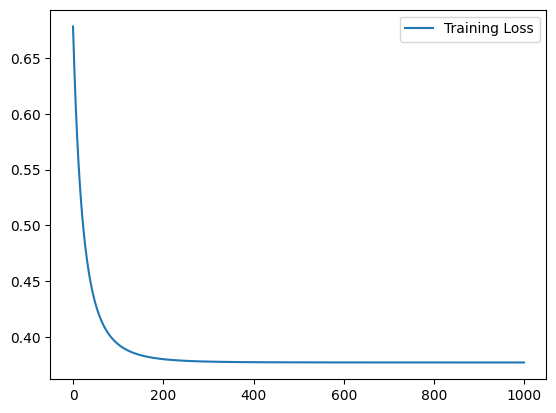

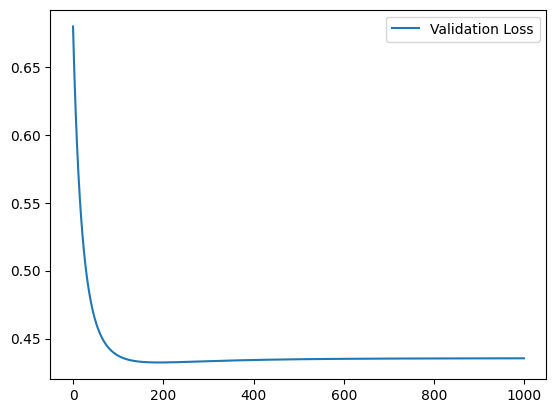

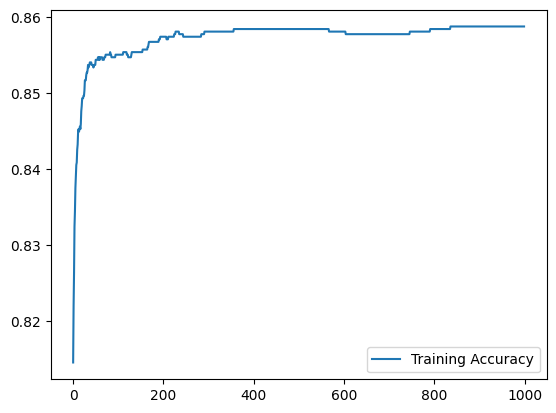

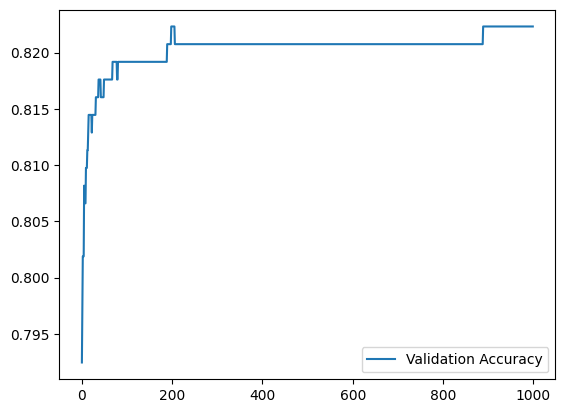

In [2580]:
train_loss_l1=[]
val_loss_l1=[]
train_accuracy_l1=[]
val_accuracy_l1=[]

weights_l1 = np.zeros(16) #16x1

print("----L1 Regularization----")
weights_l1=train_model_early_stopping(early_stopping_l1,'l2',0.1,0.1,1000,train_loss_l1,val_loss_l1,train_accuracy_l1,val_accuracy_l1,weights_l1,X_train,y_train,X_valid,y_valid)

#plot training and validation loss against 1000 epochs
import matplotlib.pyplot as plt
plt.plot(train_loss_l1,label='Training Loss')
plt.legend()
plt.show()
plt.plot(val_loss_l1,label='Validation Loss')
plt.legend()
plt.show()
plt.plot(train_accuracy_l1,label='Training Accuracy')
plt.legend()
plt.show()
plt.plot(val_accuracy_l1,label='Validation Accuracy')
plt.legend()
plt.show()


----L2 Regularization----
Epoch: 0, Training Loss: 0.6784698151007384, Validation Loss: 0.6798398786130383, Training Accuracy: 0.8145650708024275, Validation Accuracy: 0.7924528301886793
Epoch: 1, Training Loss: 0.6647482241432225, Validation Loss: 0.6674268737808283, Training Accuracy: 0.8219824679703304, Validation Accuracy: 0.7971698113207547
Epoch: 2, Training Loss: 0.6518850417962562, Validation Loss: 0.6558148741690535, Training Accuracy: 0.8263654753877275, Validation Accuracy: 0.8018867924528302
Epoch: 3, Training Loss: 0.6397997902827476, Validation Loss: 0.6449271928709952, Training Accuracy: 0.832434254888739, Validation Accuracy: 0.8018867924528302
Epoch: 4, Training Loss: 0.6284246412303053, Validation Loss: 0.6346995090898977, Training Accuracy: 0.8344571813890762, Validation Accuracy: 0.8018867924528302
Epoch: 5, Training Loss: 0.6177014260472059, Validation Loss: 0.625076890349654, Training Accuracy: 0.837491571139582, Validation Accuracy: 0.8081761006289309
Epoch: 6, T

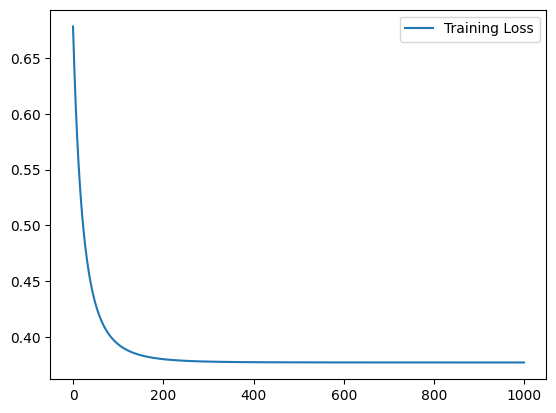

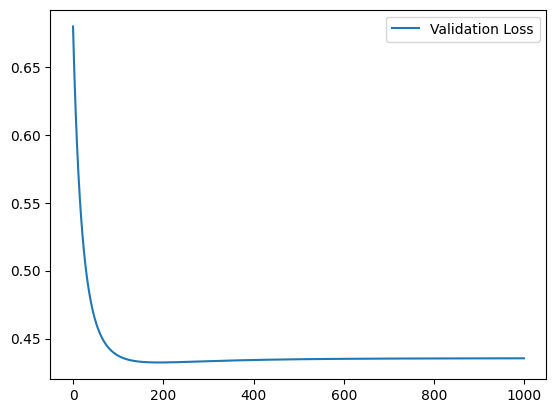

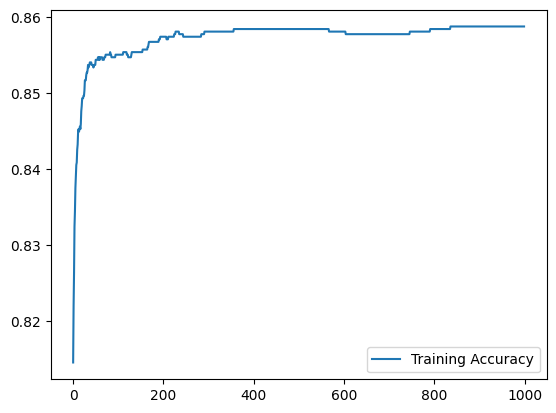

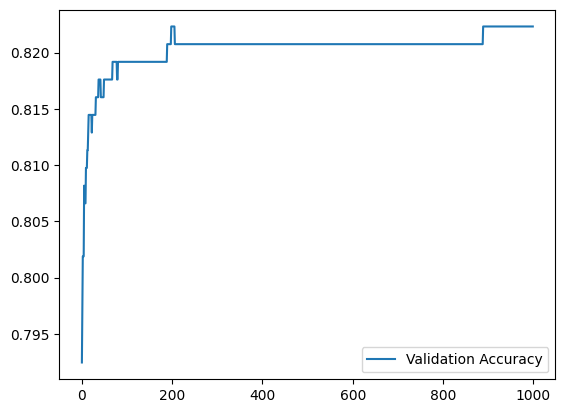

In [2581]:
train_loss_l2=[]
val_loss_l2=[]
train_accuracy_l2=[]
val_accuracy_l2=[]

weights_l2 = np.zeros(16) #16x1

print("----L2 Regularization----")
weights_l2=train_model_early_stopping(early_stopping_l2,'l2',0.1,0.1,1000,train_loss_l2,val_loss_l2,train_accuracy_l2,val_accuracy_l2,weights_l2,X_train,y_train,X_valid,y_valid)

#plot training and validation loss against 1000 epochs
import matplotlib.pyplot as plt
plt.plot(train_loss_l2,label='Training Loss')
plt.legend()
plt.show()
plt.plot(val_loss_l2,label='Validation Loss')
plt.legend()
plt.show()
plt.plot(train_accuracy_l2,label='Training Accuracy')
plt.legend()
plt.show()
plt.plot(val_accuracy_l2,label='Validation Accuracy')
plt.legend()
plt.show()
